In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({
    "font.family": "serif",
    "font.size": 18.0,
    "axes.labelsize": 18.0,
    "axes.titlesize": 18.0,
    "xtick.labelsize": 18.0,
    "ytick.labelsize": 18.0,
    "legend.fontsize": "medium",
    "legend.title_fontsize": 18.0,
    "figure.dpi": 72.0,
    "figure.figsize": (8.0, 6.0),
})

In [24]:
# Load CSV
df = pd.read_csv('tfy1_fig5.csv')
print(df)

# Rebuild arrays
umap_embeddings = df[['umap_x', 'umap_y']].values
main_type = df['Main_Type'].values

          umap_x     umap_y  Main_Type     SGA_ID
0       8.612618  12.867422       20.0   831151.0
1       3.303049  11.835283       20.0   742784.0
2       7.323075  10.071659       20.0  1007845.0
3       7.924344  11.219675       20.0   396832.0
4       7.300776  12.456076       20.0   390387.0
...          ...        ...        ...        ...
14182   8.694607   6.466538       30.0  5003042.0
14183  13.484155   8.065923       30.0  5002603.0
14184   9.270559   5.360594       30.0  5001295.0
14185  12.635356  -2.466965       30.0  1416349.0
14186  11.595555   5.490062       30.0  5003075.0

[14187 rows x 4 columns]


In [25]:
# Define the color map
morphology_colors = {
    -5: 'salmon',          # Irregulars
    0: 'cornflowerblue',   # Lenticulars
    10: 'olive',           # Spirals
    20: 'sienna',          # Ellipticals
    30: 'black',          # TFY1 to classify
}

colors = [morphology_colors[mt] for mt in main_type]

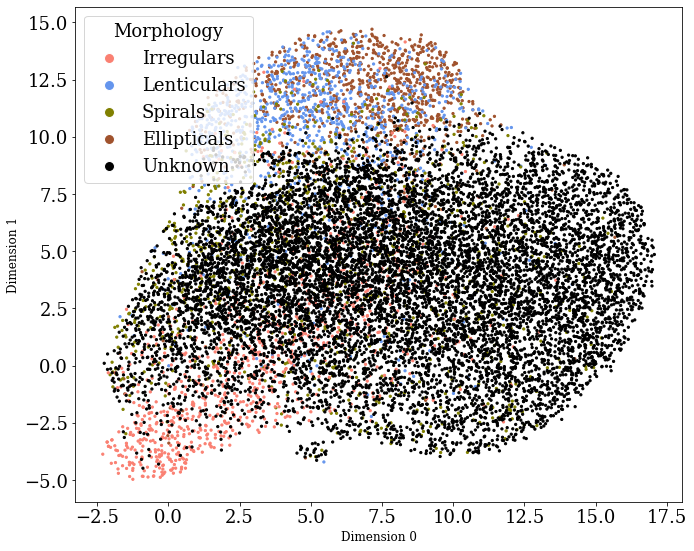

In [34]:
# Plot
plt.figure(figsize=(10, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], s=5, c=colors)

legend_labels = {
    'Irregulars': 'salmon',
    'Lenticulars': 'cornflowerblue',
    'Spirals': 'olive',
    'Ellipticals': 'sienna',
    'Unknown': 'black',
}

# Add legend to the plot
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_handles, title='Morphology', loc='upper left')

plt.legend(handles=legend_handles, title='Morphology', loc='upper left')

plt.xlabel('Dimension 0', fontsize=12)
plt.ylabel('Dimension 1', fontsize=12)
plt.tight_layout()
plt.show()

In [36]:
# Load classification file from iteration 1
pred_path = "tfy1_it1.csv"
df_pred = pd.read_csv(pred_path)

pred_cols = ["Spiral_Pred", "Elliptical_Pred", "Irregular_Pred", "Lenticular_Pred"]

In [37]:
def choose_class(row):
    """Return the first non-'Other' prediction."""
    for col in pred_cols:
        if row[col] != "Other":
            return row[col]
    return "Other"

df_pred["Class"] = df_pred.apply(choose_class, axis=1)

df_pred_only = df_pred[["SGA_ID", "Class"]]

In [38]:
# Merge predictions onto the UMAP dataframe
df_it1 = df.merge(df_pred_only, on="SGA_ID", how="left")

# map class to numeric type
class_to_code = {
    "Irregular": -5,
    "Lenticular": 0,
    "Spiral": 10,
    "Elliptical": 20,
    "Other": 30,   # still unclassified
}

df_it1["Pred_Main_Type"] = df_it1["Class"].map(class_to_code)

# determine unclassified original galaxies
is_unclassified_orig = (df_it1["Main_Type"] == 30) | (df_it1["Main_Type"].isna())

# keep original unless original was unclassified
df_it1["Main_Type_final"] = df_it1["Main_Type"]
df_it1.loc[is_unclassified_orig, "Main_Type_final"] = df_it1.loc[is_unclassified_orig, "Pred_Main_Type"]

df_it1["color"] = df_it1["Main_Type_final"].map(morphology_colors)

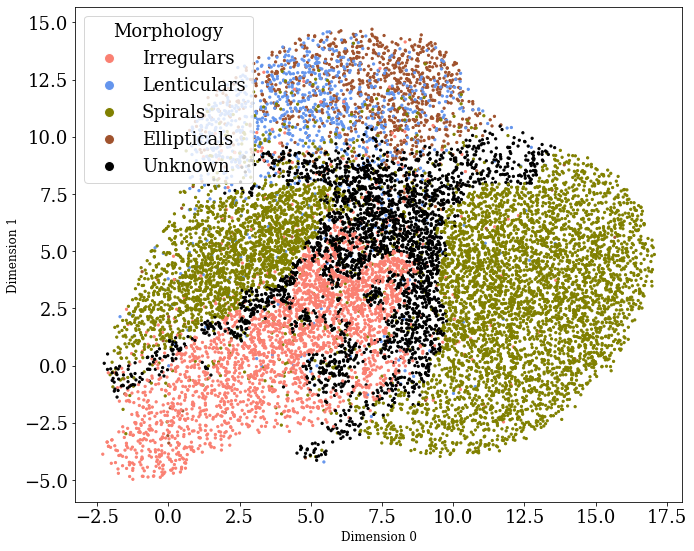

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(df_it1["umap_x"], df_it1["umap_y"], s=5, c=df_it1["color"])

# Add legend to the plot
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_handles, title='Morphology', loc='upper left')

plt.legend(handles=legend_handles, title='Morphology', loc='upper left')

plt.xlabel('Dimension 0', fontsize=12)
plt.ylabel('Dimension 1', fontsize=12)
plt.tight_layout()
plt.show()